## Summarize Relationship Task Results

First run [CollectRelationships.ipynb](CollectRelationships.ipynb) to regenerate [results/predicted-relationships-for-eval.tsv)

In [1]:
import numpy as np
import pandas as pd

In [29]:
def himax(tbl):
    """
    Prepare a table for publication, highlighting maximum values
    """
    tbl_subset = tbl.select_dtypes(include=[np.number]).columns
    return tbl.style.hide().highlight_max(subset=tbl_subset, axis=0, props='font-weight:bold').format(precision=3)

### Read in prediction results

Generated by CollectRelationships

In [52]:
df = pd.read_csv("results/predicted-relationships-for-eval.tsv", sep="\t")
df

,model_name,embedding_model_name,generate_background,task_started,task_finished,executed_on,agent,extractor,method,source_db_path,...,ontology,term_id,term_label,pred,outcome,qualifier,expected_tgt,predicted_tgt,predicted_tgt_exists,additional_collections
0,gpt-4,openai:,True,2023-09-01 10:18:02.586748,2023-09-01 10:48:40.723027,Darwin-21.6.0-Darwin Kernel Version 21.6.0: Mo...,dae,BasicExtractor,RAG+background-gpt-4,db,...,go,GO:0160073,Casparian strip assembly,subClassOf,true_positive,NaN,CellularComponentAssembly,CellularComponentAssembly,True,NaN
1,gpt-4,openai:,True,2023-09-01 10:18:02.586748,2023-09-01 10:48:40.723027,Darwin-21.6.0-Darwin Kernel Version 21.6.0: Mo...,dae,BasicExtractor,RAG+background-gpt-4,db,...,go,GO:0160073,Casparian strip assembly,PartOf,false_negative,NaN,PlantTypeCellWallAssembly,NaN,True,NaN
2,gpt-4,openai:,True,2023-09-01 10:18:02.586748,2023-09-01 10:48:40.723027,Darwin-21.6.0-Darwin Kernel Version 21.6.0: Mo...,dae,BasicExtractor,RAG+background-gpt-4,db,...,go,GO:0160073,Casparian strip assembly,ResultsInAssemblyOf,true_positive,NaN,CasparianStrip,CasparianStrip,True,NaN
3,gpt-4,openai:,True,2023-09-01 10:18:02.586748,2023-09-01 10:48:40.723027,Darwin-21.6.0-Darwin Kernel Version 21.6.0: Mo...,dae,BasicExtractor,RAG+background-gpt-4,db,...,go,GO:0120340,radial spoke base 1,subClassOf,true_positive,NaN,RadialSpokeBase,RadialSpokeBase,True,NaN
4,gpt-4,openai:,True,2023-09-01 10:18:02.586748,2023-09-01 10:48:40.723027,Darwin-21.6.0-Darwin Kernel Version 21.6.0: Mo...,dae,BasicExtractor,RAG+background-gpt-4,db,...,go,GO:0120340,radial spoke base 1,PartOf,true_positive,NaN,RadialSpoke1,RadialSpoke1,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5229,gpt-4,openai:,True,2023-09-03 22:37:08.004964,2023-09-03 23:02:01.765563,Darwin-21.6.0-Darwin Kernel Version 21.6.0: Mo...,dae,BasicExtractor,RAG+background-gpt-4,db,...,foodon,FOODON:00004454,green cardamom seed (dried),subClassOf,true_positive,NaN,CardamomFoodProduct,CardamomFoodProduct,True,NaN
5230,gpt-4,openai:,True,2023-09-03 22:37:08.004964,2023-09-03 23:02:01.765563,Darwin-21.6.0-Darwin Kernel Version 21.6.0: Mo...,dae,BasicExtractor,RAG+background-gpt-4,db,...,foodon,FOODON:00004454,green cardamom seed (dried),DerivesFrom,false_positive,NaN,NaN,GreenCardamomPlant,True,NaN
5231,gpt-4,openai:,True,2023-09-03 22:37:08.004964,2023-09-03 23:02:01.765563,Darwin-21.6.0-Darwin Kernel Version 21.6.0: Mo...,dae,BasicExtractor,RAG+background-gpt-4,db,...,foodon,FOODON:00004438,common millet (cooked),subClassOf,false_positive,NaN,NaN,Food_cooked_,False,NaN
5232,gpt-4,openai:,True,2023-09-03 22:37:08.004964,2023-09-03 23:02:01.765563,Darwin-21.6.0-Darwin Kernel Version 21.6.0: Mo...,dae,BasicExtractor,RAG+background-gpt-4,db,...,foodon,FOODON:00004438,common millet (cooked),subClassOf,false_positive,NaN,NaN,Common_millet_wholeOrPieces_,False,NaN


In [22]:
# mote: include qualifier == '' to get all results
df.groupby(['pred']).agg({'outcome': 'count'})

,outcome
pred,
AdjacentTo,14
AttachedTo,1
AxonSynapsesIn,1
BoundingLayerOf,5
CapableOf,41
...,...
inheresIn,2
partOf,1
participatesIn,1


In [23]:
df.groupby(['pred']).size()

pred
AdjacentTo           14
AttachedTo            1
AxonSynapsesIn        1
BoundingLayerOf       5
CapableOf            41
                   ... 
inheresIn             2
partOf                1
participatesIn        1
subClassOf         3668
subclassOf            1
Length: 91, dtype: int64

In [24]:
df.groupby(['method']).size()

method
RAG+background-gpt-3.5-turbo     893
RAG+background-gpt-4             783
RAG-gpt-3.5-turbo               1159
RAG-gpt-4                       1240
RAG-nous-hermes-13b             1159
dtype: int64

In [25]:
df.groupby(['method', 'ontology']).size()

method                        ontology
RAG+background-gpt-3.5-turbo  cl          173
                              envo         90
                              foodon      104
                              go          141
                              mondo       123
                              oba         152
                              obi         110
RAG+background-gpt-4          cl          198
                              envo         87
                              foodon      108
                              go          136
                              mondo       152
                              obi         102
RAG-gpt-3.5-turbo             cl          169
                              envo         86
                              foodon      104
                              go          127
                              hp           79
                              mondo       126
                              mp           71
                              oba        

In [67]:
def calculate_metrics_for_group(group):
    tp = len(group[group['outcome'] == 'true_positive'])
    fp = len(group[group['outcome'] == 'false_positive'])
    fn = len(group[group['outcome'] == 'false_negative'])
    tn = len(group[group['outcome'] == 'true_negative'])
    fn += len(group[group['outcome'] == 'partial_false_negative']) / 2

    # print(len(group[group['outcome'] == 'partial_false_negative']) / 2)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0


    return pd.Series({'precision': precision, 'recall': recall, 'f1': f1_score})


def compute_metrics_new(input_df: pd.DataFrame, ignore_ungrounded=True, use_partial=True, preds=None, group_by=None) -> pd.DataFrame:
    """
    Compute precision, recall, and F1 score grouped by model_name, method, and ontology.
    
    Parameters:
    - df: DataFrame containing the input data with columns 'model_name', 'method', 'ontology', 'tp', 'fp', 'fn'
    
    Returns:
    - DataFrame with aggregated results.
    """
    if ignore_ungrounded:
        input_df = input_df.query("predicted_tgt_exists == True")
    if use_partial:
        # set outcome to 'partial_false_negative' if (1)
        # outcome is 'false_negative' and (2) the qualifier is 'partial'
        input_df.loc[(input_df['outcome'] == 'false_negative') & (input_df['qualifier'] == 'prediction_is_more_general'), 'outcome'] = 'partial_false_negative'
    # filter by pred
    if preds is not None:
        input_df = input_df[input_df['pred'].isin(preds)]
    if group_by is None:
        group_by = ['ontology']
    # Group by 'model_name', 'method', and 'ontology' and aggregate tp, fp, and fn
    grouped = input_df.groupby(['model_name', 'method'] + group_by)
    metrics = grouped.apply(calculate_metrics_for_group)

    return metrics.reset_index()


In [68]:
def filter_main(tbl):
    return tbl.query('method.isin(["RAG-gpt-4", "RAG-gpt-3.5-turbo", "RAG-nous-hermes-13b"])')

### SubClassOf Prediction (All Ontologies)

In [69]:
himax(filter_main(compute_metrics_new(df, preds=['subClassOf'], group_by=[])))

model_name,method,precision,recall,f1
gpt-3.5-turbo,RAG-gpt-3.5-turbo,0.831,0.352,0.494
gpt-4,RAG-gpt-4,0.889,0.440,0.588
nous-hermes-13b,RAG-nous-hermes-13b,0.680,0.273,0.390


### Relationship Prediction (All Predicates, All Ontologies)

In [71]:
himax(filter_main(compute_metrics_new(df, preds=None, group_by=[])))

model_name,method,precision,recall,f1
gpt-3.5-turbo,RAG-gpt-3.5-turbo,0.746,0.392,0.514
gpt-4,RAG-gpt-4,0.797,0.456,0.580
nous-hermes-13b,RAG-nous-hermes-13b,0.597,0.292,0.392


## Comparing generate-background method

In [72]:
himax(compute_metrics_new(df, preds=None, group_by=[]))

model_name,method,precision,recall,f1
gpt-3.5-turbo,RAG+background-gpt-3.5-turbo,0.782,0.409,0.537
gpt-3.5-turbo,RAG-gpt-3.5-turbo,0.746,0.392,0.514
gpt-4,RAG+background-gpt-4,0.726,0.432,0.541
gpt-4,RAG-gpt-4,0.797,0.456,0.580
nous-hermes-13b,RAG-nous-hermes-13b,0.597,0.292,0.392


## All Results, gpt-4

In [73]:
m = compute_metrics_new(df)
m.query('model_name=="gpt-4"')

,model_name,method,ontology,precision,recall,f1
17,gpt-4,RAG+background-gpt-4,cl,0.744681,0.355330,0.481100
18,gpt-4,RAG+background-gpt-4,envo,0.918919,0.566667,0.701031
19,gpt-4,RAG+background-gpt-4,foodon,0.711538,0.616667,0.660714
20,gpt-4,RAG+background-gpt-4,go,0.803922,0.488095,0.607407
21,gpt-4,RAG+background-gpt-4,mondo,0.487805,0.240964,0.322581
22,gpt-4,RAG+background-gpt-4,obi,0.684211,0.422764,0.522613
23,gpt-4,RAG-gpt-4,cl,0.851064,0.404040,0.547945
24,gpt-4,RAG-gpt-4,envo,0.847826,0.644628,0.732394
25,gpt-4,RAG-gpt-4,foodon,0.800000,0.610169,0.692308
26,gpt-4,RAG-gpt-4,go,0.860000,0.494253,0.627737


In [74]:
compute_metrics_new(df, preds=['subClassOf']).query('model_name=="gpt-4"')

,model_name,method,ontology,precision,recall,f1
17,gpt-4,RAG+background-gpt-4,cl,0.923077,0.400000,0.558140
18,gpt-4,RAG+background-gpt-4,envo,0.968750,0.659574,0.784810
19,gpt-4,RAG+background-gpt-4,foodon,0.909091,0.576923,0.705882
20,gpt-4,RAG+background-gpt-4,go,0.923077,0.444444,0.600000
21,gpt-4,RAG+background-gpt-4,mondo,0.681818,0.223881,0.337079
22,gpt-4,RAG+background-gpt-4,obi,1.000000,0.457143,0.627451
23,gpt-4,RAG-gpt-4,cl,0.961538,0.420168,0.584795
24,gpt-4,RAG-gpt-4,envo,0.945946,0.736842,0.828402
25,gpt-4,RAG-gpt-4,foodon,0.935484,0.568627,0.707317
26,gpt-4,RAG-gpt-4,go,0.866667,0.456140,0.597701


In [75]:
result_df = compute_metrics_new(df)

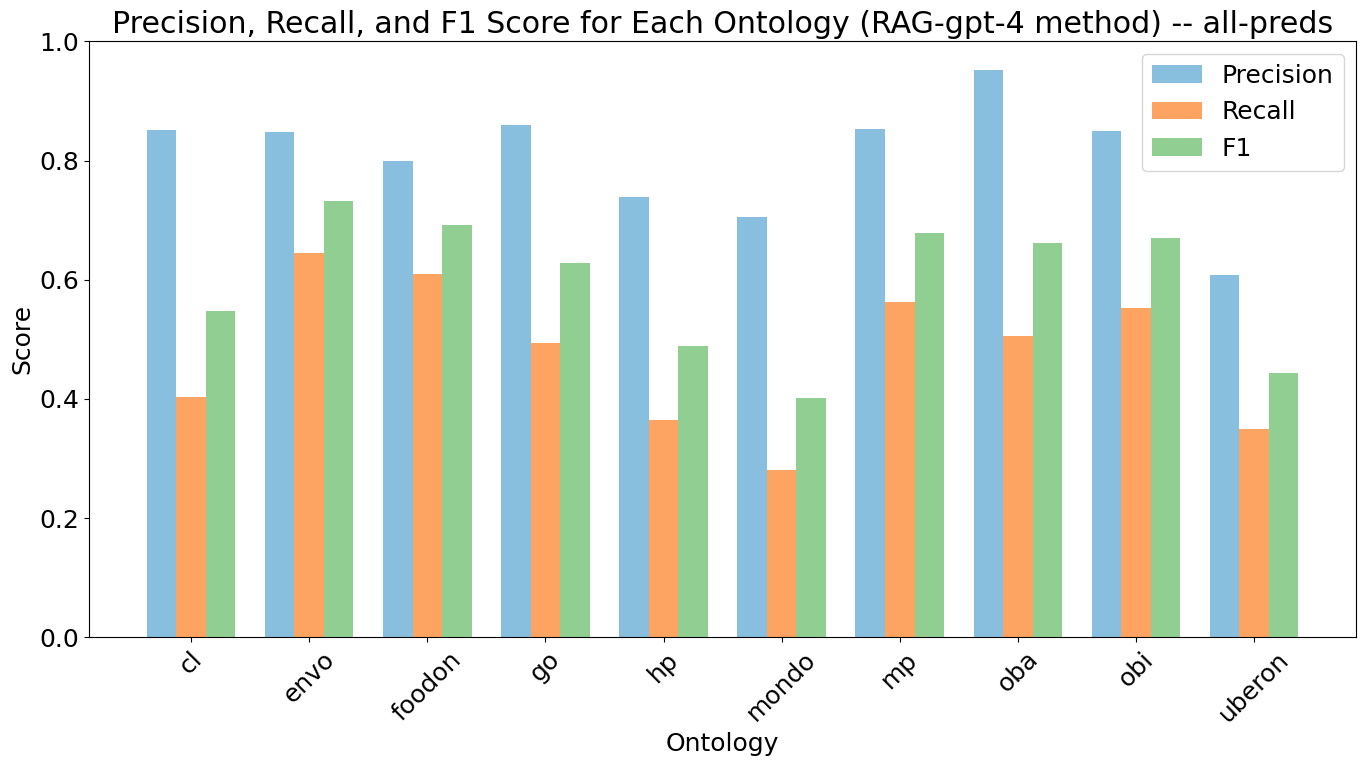

In [143]:
# Importing required libraries
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 18}) # Set default font size


def plot_results(data_df, name, method='RAG-gpt-4', **kwargs):

    result_df = compute_metrics_new(df, **kwargs)
    # Adjusting the colors to be less garish
    colors = ['#6baed6', '#fd8d3c', '#74c476']
    
    # Setting up the figure and axis
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Set the bar width
    bar_width = 0.25
    
    grouped_data = result_df.query(f"method=='{method}'")[["model_name", "ontology", "precision", "recall", "f1"]]
    # Set the index for each ontology
    indices = range(len(grouped_data))
    
    # Plot precision bars with adjusted color
    rects1 = ax.bar(indices, grouped_data['precision'], bar_width, label='Precision', color=colors[0], alpha=0.8)
    
    # Plot recall bars (shifted by bar_width) with adjusted color
    rects2 = ax.bar([i + bar_width for i in indices], grouped_data['recall'], bar_width, label='Recall', color=colors[1], alpha=0.8)
    
    # Plot F1 score bars (shifted by 2*bar_width) with adjusted color
    rects3 = ax.bar([i + 2*bar_width for i in indices], grouped_data['f1'], bar_width, label='F1', color=colors[2], alpha=0.8)
    
    # Set the title and labels
    ax.set_xlabel('Ontology')
    ax.set_ylabel('Score')
    ax.set_title(f'Precision, Recall, and F1 Score for Each Ontology ({method} method) -- {name}')
    ax.set_xticks([i + bar_width for i in indices])
    ax.set_xticklabels(grouped_data['ontology'])
    ax.legend()
    
    # Rotate x labels for better readability
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    plt.savefig(f"results/relationships-{name}.png")
    plt.show()

plot_results(df, "all-preds")

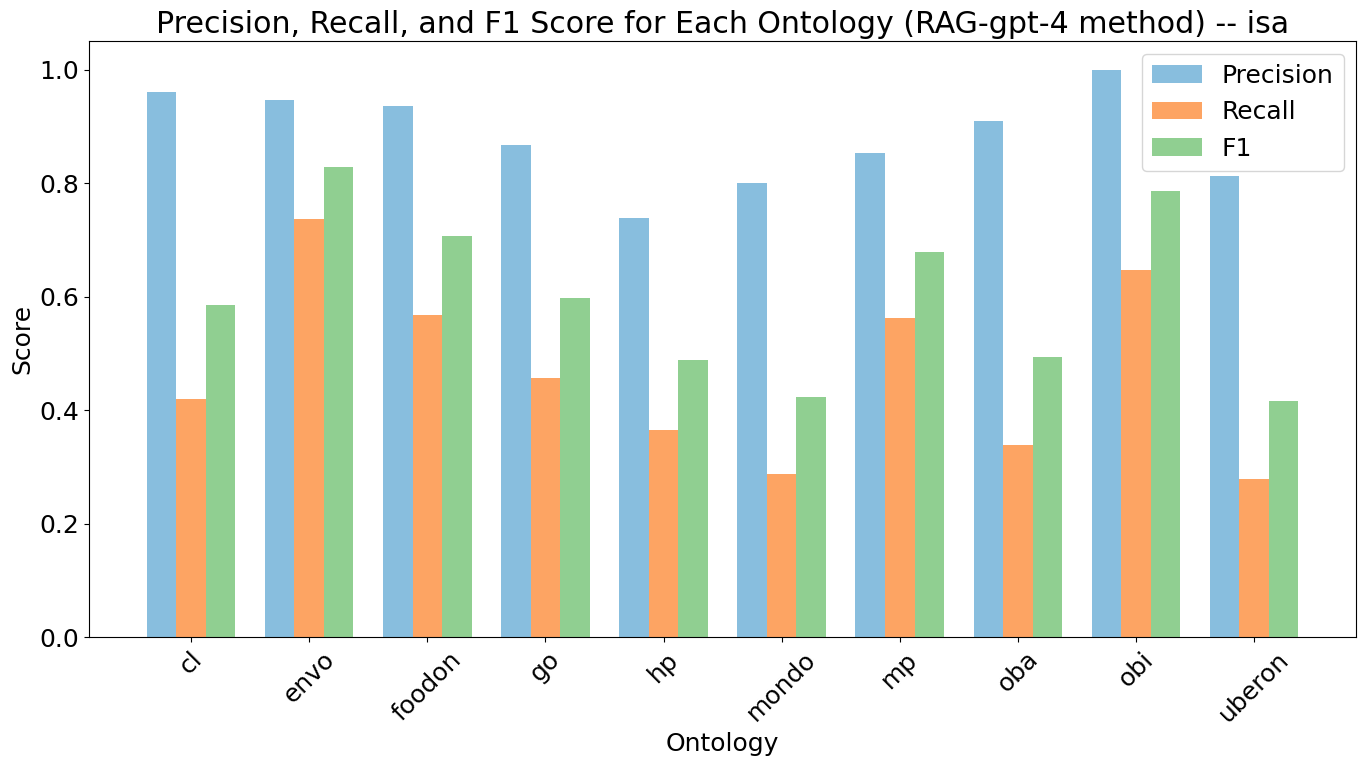

In [144]:
plot_results(df, "isa", preds=["subClassOf"])

In [80]:
#isa_df = pd.read_csv("results/relationship-analysis-isa.tsv", sep="\t")
#isa_df

## Comparison - owl2vec

In [81]:
isa_metrics = compute_metrics_new(df, preds=["subClassOf"])
isa_metrics

,model_name,method,ontology,precision,recall,f1
0,gpt-3.5-turbo,RAG+background-gpt-3.5-turbo,cl,0.956522,0.376068,0.539877
1,gpt-3.5-turbo,RAG+background-gpt-3.5-turbo,envo,1.000000,0.593407,0.744828
2,gpt-3.5-turbo,RAG+background-gpt-3.5-turbo,foodon,0.818182,0.360000,0.500000
3,gpt-3.5-turbo,RAG+background-gpt-3.5-turbo,go,0.821429,0.396552,0.534884
4,gpt-3.5-turbo,RAG+background-gpt-3.5-turbo,mondo,0.631579,0.173913,0.272727
5,gpt-3.5-turbo,RAG+background-gpt-3.5-turbo,oba,0.935484,0.343195,0.502165
6,gpt-3.5-turbo,RAG+background-gpt-3.5-turbo,obi,0.961538,0.476190,0.636943
7,gpt-3.5-turbo,RAG-gpt-3.5-turbo,cl,0.857143,0.297521,0.441718
8,gpt-3.5-turbo,RAG-gpt-3.5-turbo,envo,0.935484,0.644444,0.763158
9,gpt-3.5-turbo,RAG-gpt-3.5-turbo,foodon,0.821429,0.464646,0.593548


In [82]:
#isa_metrics = compute_metrics(isa_df)
owl2vec_compare = isa_metrics.query("(ontology == 'go' or ontology=='foodon') and method in ['RAG-gpt-4', 'RAG-gpt-3.5-turbo', 'RAG-nous-hermes-13b']")[["model_name", "method", "ontology", "precision"]]
owl2vec_compare

,model_name,method,ontology,precision
9,gpt-3.5-turbo,RAG-gpt-3.5-turbo,foodon,0.821429
10,gpt-3.5-turbo,RAG-gpt-3.5-turbo,go,0.950000
25,gpt-4,RAG-gpt-4,foodon,0.935484
26,gpt-4,RAG-gpt-4,go,0.866667
35,nous-hermes-13b,RAG-nous-hermes-13b,foodon,0.809524
36,nous-hermes-13b,RAG-nous-hermes-13b,go,0.583333


In [83]:
rows = [{
  "method": "owl2vec*",
  "ontology": "foodon",
  "precision": 0.143,
},{
    "method": "owl2vec*",
    "ontology": "go",
    "precision": 0.076
},
       {
  "method": "rdf2vec",
  "ontology": "foodon",
  "precision": 0.053,
},{
    "method": "rdf2vec",
    "ontology": "go",
    "precision": 0.017
}
       ]

owl2vec_compare2 = pd.concat([pd.DataFrame(rows), owl2vec_compare])
subset = owl2vec_compare2.select_dtypes(include=[np.number]).columns
owl2vec_compare2.style.hide().highlight_max(subset=subset, axis=0, props='font-weight:bold').format(precision=3)

method,ontology,precision,model_name
owl2vec*,foodon,0.143,nan
owl2vec*,go,0.076,nan
rdf2vec,foodon,0.053,nan
rdf2vec,go,0.017,nan
RAG-gpt-3.5-turbo,foodon,0.821,gpt-3.5-turbo
RAG-gpt-3.5-turbo,go,0.950,gpt-3.5-turbo
RAG-gpt-4,foodon,0.935,gpt-4
RAG-gpt-4,go,0.867,gpt-4
RAG-nous-hermes-13b,foodon,0.810,nous-hermes-13b
RAG-nous-hermes-13b,go,0.583,nous-hermes-13b


In [84]:
precision_pivot = owl2vec_compare2.pivot_table(index='method', columns='ontology', values='precision', aggfunc='mean').reset_index()
subset = precision_pivot.select_dtypes(include=[np.number]).columns
precision_pivot.sort_values("foodon").style.hide().highlight_max(subset=subset, axis=0, props='font-weight:bold').format(precision=3)

method,foodon,go
rdf2vec,0.053,0.017
owl2vec*,0.143,0.076
RAG-nous-hermes-13b,0.810,0.583
RAG-gpt-3.5-turbo,0.821,0.950
RAG-gpt-4,0.935,0.867


## Comparison - Elk

In [130]:
elk_df = pd.read_csv("results/elk/all-outcomes.csv")

In [131]:
def calculate_elk_metrics(tp: int, fn: int):
    fp = 0 # all OWL reasoner results are valid by definition

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1_score


In [132]:
for index, row in elk_df.iterrows():
    precision, recall, f1 = calculate_elk_metrics(row['tp'], row['fn'])
    elk_df.at[index, 'precision'] = precision
    elk_df.at[index, 'recall'] = recall
    elk_df.at[index, 'f1'] = f1
    elk_df.at[index, 'model_name'] = 'elk'
    elk_df.at[index, 'method'] = 'reasoning'

elk_df

,ontology,tp,fn,notes,precision,recall,f1,model_name,method
0,cl,26,39,NaN,1.0,0.400000,0.571429,elk,reasoning
1,envo,3,41,NaN,1.0,0.068182,0.127660,elk,reasoning
2,foodon,8,46,NaN,1.0,0.148148,0.258065,elk,reasoning
3,go,20,43,NaN,1.0,0.317460,0.481928,elk,reasoning
4,hp,1,50,NaN,1.0,0.019608,0.038462,elk,reasoning
5,mondo,23,52,NaN,1.0,0.306667,0.469388,elk,reasoning
6,mp,20,37,NaN,1.0,0.350877,0.519481,elk,reasoning
7,oba,79,0,NaN,1.0,1.000000,1.000000,elk,reasoning
8,obi,11,41,NaN,1.0,0.211538,0.349206,elk,reasoning
9,uberon,9,45,NaN,1.0,0.166667,0.285714,elk,reasoning


In [133]:
all_df = pd.concat([elk_df, isa_metrics])
all_df

,ontology,tp,fn,notes,precision,recall,f1,model_name,method
0,cl,26.0,39.0,NaN,1.000000,0.400000,0.571429,elk,reasoning
1,envo,3.0,41.0,NaN,1.000000,0.068182,0.127660,elk,reasoning
2,foodon,8.0,46.0,NaN,1.000000,0.148148,0.258065,elk,reasoning
3,go,20.0,43.0,NaN,1.000000,0.317460,0.481928,elk,reasoning
4,hp,1.0,50.0,NaN,1.000000,0.019608,0.038462,elk,reasoning
5,mondo,23.0,52.0,NaN,1.000000,0.306667,0.469388,elk,reasoning
6,mp,20.0,37.0,NaN,1.000000,0.350877,0.519481,elk,reasoning
7,oba,79.0,0.0,NaN,1.000000,1.000000,1.000000,elk,reasoning
8,obi,11.0,41.0,NaN,1.000000,0.211538,0.349206,elk,reasoning
9,uberon,9.0,45.0,NaN,1.000000,0.166667,0.285714,elk,reasoning


In [134]:
f1_pivot = all_df.pivot_table(index='method', columns='ontology', values='f1', aggfunc='mean').reset_index()
subset = f1_pivot.select_dtypes(include=[np.number]).columns
f1_pivot

ontology,method,cl,envo,foodon,go,hp,mondo,mp,oba,obi,uberon
0,RAG+background-gpt-3.5-turbo,0.539877,0.744828,0.500000,0.534884,NaN,0.272727,NaN,0.502165,0.636943,NaN
1,RAG+background-gpt-4,0.558140,0.784810,0.705882,0.600000,NaN,0.337079,NaN,NaN,0.627451,NaN
2,RAG-gpt-3.5-turbo,0.441718,0.763158,0.593548,0.493506,0.350365,0.414508,0.500000,0.451883,0.635762,0.261682
3,RAG-gpt-4,0.584795,0.828402,0.707317,0.597701,0.489209,0.423280,0.678363,0.493827,0.786127,0.416000
4,RAG-nous-hermes-13b,0.358974,0.769231,0.478873,0.345679,0.344371,0.214286,0.379562,0.318584,0.475524,0.250000
5,reasoning,0.571429,0.127660,0.258065,0.481928,0.038462,0.469388,0.519481,1.000000,0.349206,0.285714


In [135]:
himax(f1_pivot.query("method != 'RAG+background-gpt-3.5-turbo' and method != 'RAG+background-gpt-4'"))

method,cl,envo,foodon,go,hp,mondo,mp,oba,obi,uberon
RAG-gpt-3.5-turbo,0.442,0.763,0.594,0.494,0.350,0.415,0.500,0.452,0.636,0.262
RAG-gpt-4,0.585,0.828,0.707,0.598,0.489,0.423,0.678,0.494,0.786,0.416
RAG-nous-hermes-13b,0.359,0.769,0.479,0.346,0.344,0.214,0.380,0.319,0.476,0.250
reasoning,0.571,0.128,0.258,0.482,0.038,0.469,0.519,1.000,0.349,0.286


In [136]:
#

In [137]:
tp = elk_df['tp'].sum()
fn = elk_df['fn'].sum()

In [138]:
recall = tp / (tp + fn) 
recall

0.3367003367003367

In [139]:
f1_score = 2 * (1 * recall) / (1 + recall)
f1_score

0.5037783375314862